In [47]:
%matplotlib inline

In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures

from sklearn.linear_model import RANSACRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [49]:
housing_data = pd.read_fwf("https://raw.githubusercontent.com/rupakc/UCI-Data-Analysis/master/Boston%20Housing%20Dataset/Boston%20Housing/housing.data", header = None)

In [50]:
housing_data.describe().T

,count,mean,std,min,25%,50%,75%,max
0,506.0,1.716290,2.653510,0.00632,0.0819,0.250895,2.326717,9.96654
1,506.0,11.363636,23.322453,0.00000,0.0000,0.000000,12.500000,100.00000
2,506.0,11.136779,6.860353,0.46000,5.1900,9.690000,18.100000,27.74000
3,506.0,0.069170,0.253994,0.00000,0.0000,0.000000,0.000000,1.00000
4,506.0,0.554695,0.115878,0.38500,0.4490,0.538000,0.624000,0.87100
5,506.0,6.284634,0.702617,3.56100,5.8855,6.208500,6.623500,8.78000
6,506.0,68.574901,28.148861,2.90000,45.0250,77.500000,94.075000,100.00000
7,506.0,3.696228,1.999689,0.58570,2.0737,3.107300,5.112625,9.22290
8,506.0,4.332016,1.417166,1.00000,4.0000,4.000000,5.000000,8.00000
9,506.0,408.237154,168.537116,187.00000,279.0000,330.000000,666.000000,711.00000


In [51]:
target = housing_data[13]

In [52]:
attributes = housing_data.drop(columns=[13])

In [53]:
scaler = MinMaxScaler()
scaler.fit(attributes)

MinMaxScaler()

In [54]:
scaler.data_range_

array([9.96022e+00, 1.00000e+02, 2.72800e+01, 1.00000e+00, 4.86000e-01,
       5.21900e+00, 9.71000e+01, 8.63720e+00, 7.00000e+00, 5.24000e+02,
       9.40000e+00, 3.96580e+02, 3.62400e+01])

In [55]:
scaler.data_min_

array([6.320e-03, 0.000e+00, 4.600e-01, 0.000e+00, 3.850e-01, 3.561e+00,
       2.900e+00, 5.857e-01, 1.000e+00, 1.870e+02, 1.260e+01, 3.200e-01,
       1.730e+00])

In [56]:
attributes = scaler.transform(attributes)

In [57]:
linear_regression = LinearRegression()

In [58]:
linear_regression.fit(attributes, target)

LinearRegression()

In [59]:
linear_regression.score(attributes, target)

0.7198065414937174

In [60]:
predictions = linear_regression.predict(attributes)

In [61]:
mean_squared_error(target, predictions)

23.65380740496137

In [62]:
np.sqrt(((predictions - target) ** 2).sum() / len(target))

4.86351800705635

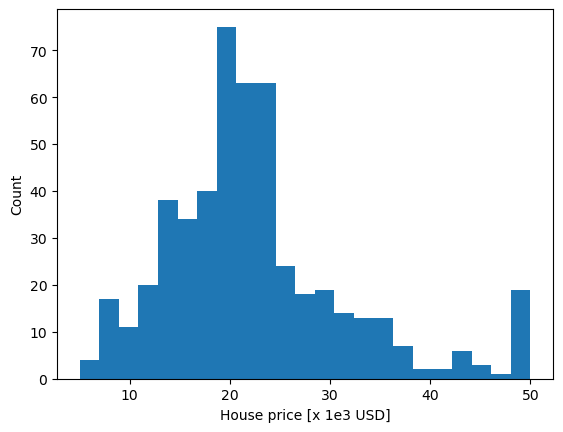

In [63]:
plt.hist(target, bins='fd')
plt.xlabel('House price [x 1e3 USD]') # 1 * (10 ** 3)
plt.ylabel('Count')
plt.show()

In [64]:
target.mean()

22.532806324110677

In [65]:
target.skew()

1.1080984082549072

In [66]:
(np.abs(target - predictions) / target).mean() * 100

17.157373124869423

In [67]:
targets_lt_10k = target[target <= 10]

In [68]:
attributes_lt_10k = housing_data.loc[targets_lt_10k.index].drop(columns=13)

In [69]:
predictions_lt_10k = linear_regression.predict(attributes_lt_10k)

In [70]:
(np.abs(targets_lt_10k - predictions_lt_10k) / targets_lt_10k).mean() * 100

7448.500313937052

In [71]:
linear_regression.coef_

array([  2.08448854,   1.49403979,   0.34690497,   3.00565375,
        -7.54441381,  22.43940145,   0.27658754,  -9.35981793,
         1.35281035,  -1.26826011,  -9.07603108,   3.74177288,
       -19.03479847])

In [72]:
linear_regression.intercept_ # свободен член

23.689291534676954

In [73]:
ransac = RANSACRegressor()

In [74]:
ransac.fit(attributes, target)

RANSACRegressor()

In [75]:
ransac.inlier_mask_.sum() / len(target)

0.6541501976284585

In [76]:
(np.abs(target - ransac.predict(attributes)) / target).mean() * 100

21.277171335772746

In [77]:
inliers = attributes[ransac.inlier_mask_]

In [78]:
inlier_targets = target[ransac.inlier_mask_]

In [79]:
ransac.predict(inliers)

array([22.08325738, 22.66540924, 22.39582533, 18.20199361, 20.64720306,
       20.90403688, 24.53525657, 17.77181648, 16.898766  , 17.27123143,
       20.17837045, 17.26399855, 15.7138528 , 12.62836089, 16.51865326,
       15.09429294, 15.92975666, 14.15706282, 14.51301015, 20.54791637,
       22.64737107, 13.8096409 , 15.71514748, 13.5571702 , 13.07753786,
       12.99432115, 19.16416933, 18.49480378, 20.41351722, 22.76199176,
       29.43138805, 33.74208119, 30.85884558, 24.79295848, 25.8982931 ,
       21.52365349, 19.11605813, 20.8469824 , 18.56371879, 13.6571604 ,
       16.13831758, 21.65570186, 20.73138889, 27.92683909, 23.48466666,
       17.04527336, 34.83862654, 24.52186689, 31.13334981, 21.67869218,
       19.00161097, 15.84579803, 15.26299366, 21.56205924, 26.83362367,
       21.9456202 , 19.41717966, 16.09680564, 18.52819685, 25.45238966,
       20.30599379, 21.99595324, 23.72754925, 25.32665507, 21.54926298,
       19.10651403, 20.6634828 , 20.61431628, 18.86699594, 27.70

In [80]:
(np.abs(inlier_targets - ransac.predict(inliers)) / target).mean() * 100

7.375684141447278

In [81]:
poly = PolynomialFeatures(degree=3)

In [82]:
poly.fit(attributes)

PolynomialFeatures(degree=3)

In [83]:
attributes_quadratic = poly.transform(attributes)

In [84]:
attributes.shape

(506, 13)

In [85]:
linear_regression.fit(attributes_quadratic, target)

LinearRegression()

In [86]:
predictions = linear_regression.predict(attributes_quadratic)

In [87]:
(np.abs(target - predictions) / target).mean() * 100

0.8962006844876305

In [88]:
linear_regression.coef_

array([ 6.24419289e-02,  4.57212521e+05,  2.08119645e+05, -6.95739039e+05,
       -8.45502690e+02,  9.82329168e+05,  1.34074260e+03, -1.18786561e+04,
        9.30214620e+03,  2.12775581e+05,  4.95230711e+04,  8.88238277e+05,
       -9.80957094e+02,  4.28467765e+04, -9.85433981e+03,  4.23146614e+05,
        7.62882568e+04, -1.19313989e+03,  3.27041774e+05,  1.76160856e+04,
       -7.59837608e+04,  2.49917998e+04, -7.81867185e+05, -3.36434175e+05,
       -3.30163028e+05, -3.17252199e+05,  2.49226773e+04, -8.85447688e+04,
       -2.76119688e+05, -3.80610074e+03, -1.29407330e+06, -8.35407370e+04,
       -1.03396335e+05, -9.61068947e+04, -6.69720016e+05,  1.06557409e+05,
       -9.30409345e+05,  5.27846487e+05,  1.24538198e+05,  8.41855012e+05,
        1.90894396e+02, -1.21009520e+06, -5.94678732e+03, -2.85956719e+03,
        7.64667221e+03, -3.16045963e+05,  1.54639312e+06,  1.53275593e+06,
        1.27178326e+05, -5.09003898e+04, -8.45480890e+02,  1.23949295e+02,
        2.12417133e+03, -

In [89]:
poly.get_feature_names_out()[1:]

array(['x0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10',
       'x11', 'x12', 'x0^2', 'x0 x1', 'x0 x2', 'x0 x3', 'x0 x4', 'x0 x5',
       'x0 x6', 'x0 x7', 'x0 x8', 'x0 x9', 'x0 x10', 'x0 x11', 'x0 x12',
       'x1^2', 'x1 x2', 'x1 x3', 'x1 x4', 'x1 x5', 'x1 x6', 'x1 x7',
       'x1 x8', 'x1 x9', 'x1 x10', 'x1 x11', 'x1 x12', 'x2^2', 'x2 x3',
       'x2 x4', 'x2 x5', 'x2 x6', 'x2 x7', 'x2 x8', 'x2 x9', 'x2 x10',
       'x2 x11', 'x2 x12', 'x3^2', 'x3 x4', 'x3 x5', 'x3 x6', 'x3 x7',
       'x3 x8', 'x3 x9', 'x3 x10', 'x3 x11', 'x3 x12', 'x4^2', 'x4 x5',
       'x4 x6', 'x4 x7', 'x4 x8', 'x4 x9', 'x4 x10', 'x4 x11', 'x4 x12',
       'x5^2', 'x5 x6', 'x5 x7', 'x5 x8', 'x5 x9', 'x5 x10', 'x5 x11',
       'x5 x12', 'x6^2', 'x6 x7', 'x6 x8', 'x6 x9', 'x6 x10', 'x6 x11',
       'x6 x12', 'x7^2', 'x7 x8', 'x7 x9', 'x7 x10', 'x7 x11', 'x7 x12',
       'x8^2', 'x8 x9', 'x8 x10', 'x8 x11', 'x8 x12', 'x9^2', 'x9 x10',
       'x9 x11', 'x9 x12', 'x10^2', 'x10 x11', 'x10 x12', 'x11^

In [90]:
list(zip(poly.get_feature_names_out()[1:], linear_regression.coef_))

[('x0', 0.0624419289091962),
 ('x1', 457212.5211858161),
 ('x2', 208119.6451113981),
 ('x3', -695739.0389053643),
 ('x4', -845.5026898473781),
 ('x5', 982329.1678379091),
 ('x6', 1340.7425966773358),
 ('x7', -11878.656062740654),
 ('x8', 9302.146198736054),
 ('x9', 212775.58079052484),
 ('x10', 49523.071139679516),
 ('x11', 888238.2769140187),
 ('x12', -980.9570942347297),
 ('x0^2', 42846.776474095066),
 ('x0 x1', -9854.339813590797),
 ('x0 x2', 423146.61393558275),
 ('x0 x3', 76288.25680362964),
 ('x0 x4', -1193.1398891100023),
 ('x0 x5', 327041.7744341802),
 ('x0 x6', 17616.085586208188),
 ('x0 x7', -75983.76081421017),
 ('x0 x8', 24991.799802624035),
 ('x0 x9', -781867.1854162416),
 ('x0 x10', -336434.17524320225),
 ('x0 x11', -330163.02823454107),
 ('x0 x12', -317252.19895295135),
 ('x1^2', 24922.677335437762),
 ('x1 x2', -88544.76884485908),
 ('x1 x3', -276119.6879977949),
 ('x1 x4', -3806.1007373597063),
 ('x1 x5', -1294073.2956193986),
 ('x1 x6', -83540.73702236018),
 ('x1 x7', 

In [91]:
np.sqrt(mean_squared_error(target, predictions))

0.2892138861500657